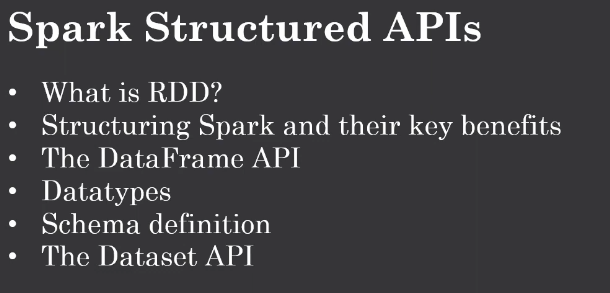

# 🔷 Spark Structured APIs

Spark provides **structured APIs** to process large-scale data efficiently using high-level abstractions. These APIs include RDDs, DataFrames, and Datasets.

---


### 1. What is RDD?

**RDD (Resilient Distributed Dataset)** is the fundamental data structure in Spark.

- Immutable, distributed collection of objects.
- Allows parallel operations across a cluster.
- Offers fault tolerance through lineage information.
- Enables fine-grained control with low-level transformations.

### Example:
```scala
val rdd = spark.sparkContext.textFile("data.txt")
val words = rdd.flatMap(line => line.---split(" "))


### 2. Structuring Spark and Their Key Benefits


#### Structuring Spark and Their Key Benefits

Structured APIs (DataFrames and Datasets) simplify and optimize big data processing.

##### 🔹 Key Benefits:
- **Declarative syntax** with SQL-like operations
- **Optimized Execution** using Catalyst and Tungsten
- **Interoperability** with Spark SQL and BI tools
- **Automatic optimization** of queries
- **Ease of use** across multiple languages (Scala, Java, Python, R)

Structured APIs help developers write less code while achieving better performance.

---

### 3. The DataFrame API

A **DataFrame** is a distributed collection of data organized into named columns.

- Similar to a table in a relational database.
- Built on top of RDDs.
- Uses Catalyst optimizer for performance improvements.

#### Operations:
- `select`, `filter`, `groupBy`, `agg`, `join`, `orderBy`, etc.

##### Example:
```scala
val df = spark.read.json("people.json")
df.select("name", "age").show()
---

### 4. Datatypes


#### Datatypes in Spark

Spark SQL provides several data types for schema definition.

##### 🔸 Primitive Types:
- `StringType`, `IntegerType`, `DoubleType`, `BooleanType`, etc.

##### 🔸 Complex Types:
- `StructType` – nested fields
- `ArrayType` – lists
- `MapType` – key-value pairs

###### Example:
```scala
import org.apache.spark.sql.types._

val schema = StructType(Array(
  StructField("name", StringType, true),
  StructField("age", IntegerType, true)
))



---

### 5. Schema Definition


#### Schema Definition in Spark

A schema defines the structure of a DataFrame, including field names, types, and nullability.

###### 🔹 Two Ways to Define Schema:
1. **Schema Inference** (Automatic)
2. **User-Defined Schema** (Manual)

###### Manual Schema Example:
```scala
val schema = StructType(Array(
  StructField("id", IntegerType, false),
  StructField("name", StringType, true)
))

val df = spark.read.schema(schema).json("people.json")



---

### 6. The Dataset API


#### The Dataset API

A **Dataset** is a distributed collection of typed JVM objects.

- Provides type safety at compile-time.
- Combines benefits of RDDs (strong typing) and DataFrames (optimization).
- Available in **Scala** and **Java** (not Python).

##### Example:
```scala
case class Person(name: String, age: Int)
val ds = spark.read.json("people.json").as[Person]
ds.filter(_.age > 18).show()


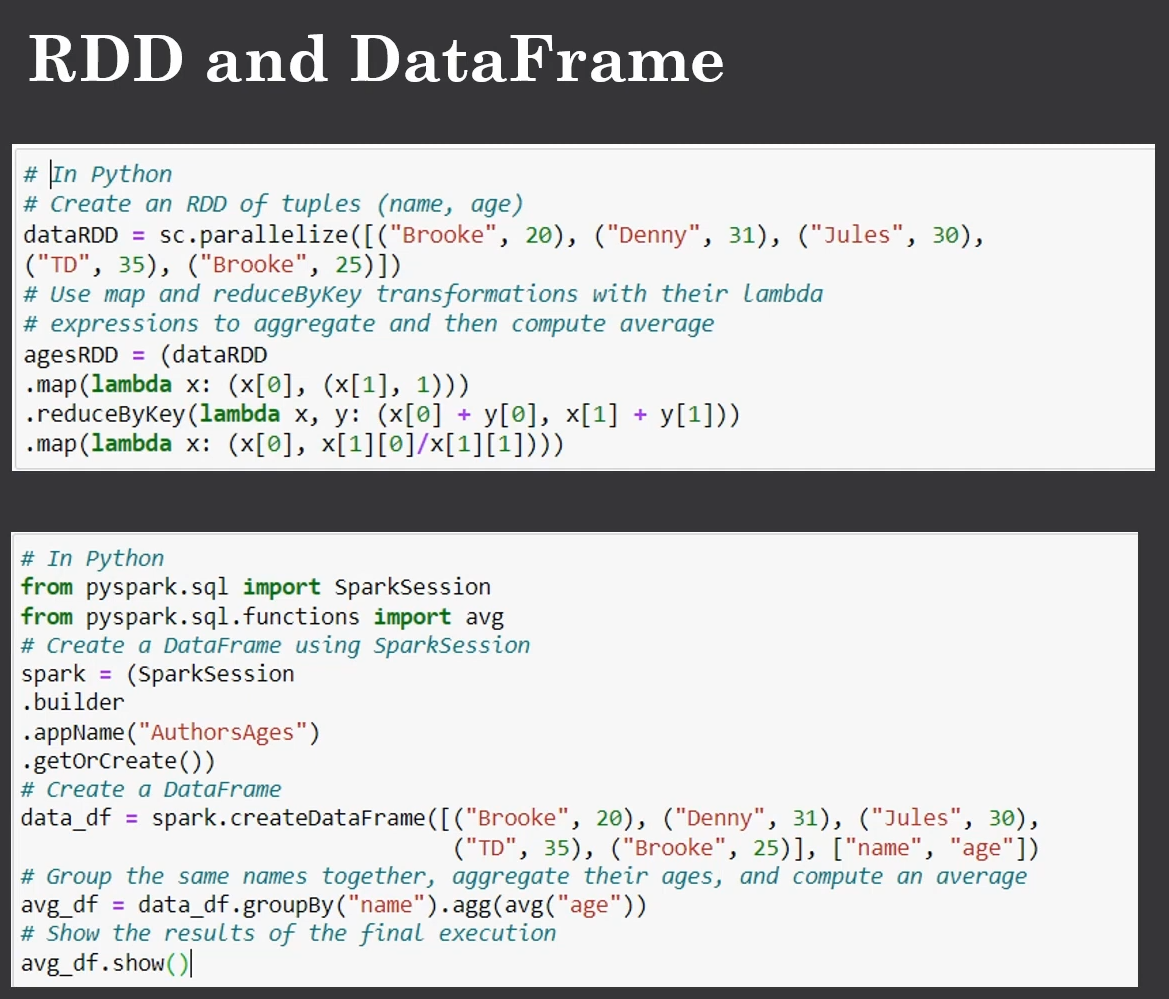

In [16]:
import os
import sys

from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Explicitly set python executable
os.environ["PYSPARK_PYTHON"] = sys.executable

spark = SparkSession.builder.appName("AverageAge").getOrCreate()
try:
    data = [("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35), ("Brooke", 25)]
    df = spark.createDataFrame(data, ["name", "age"])
    avg_ages = df.groupBy("name").agg(avg("age").alias("avg_age"))
    avg_ages.show()
finally:
    spark.stop()


+------+-------+
|  name|avg_age|
+------+-------+
|Brooke|   22.5|
| Denny|   31.0|
| Jules|   30.0|
|    TD|   35.0|
+------+-------+



In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Initialize SparkSession
spark = (SparkSession.builder
         .appName("AuthorsAges")
         .master("local")
         .getOrCreate())

# Create a DataFrame with name and age
data_df = spark.createDataFrame([
    ("Brooke", 20), 
    ("Denny", 31), 
    ("Jules", 30), 
    ("TD", 35), 
    ("Brooke", 25)
], ["name", "age"])

# Group by name and compute average age
avg_df = data_df.groupBy("name").agg(avg("age").alias("average_age"))

# Show the result
avg_df.show()

# Stop SparkSession
spark.stop()


+------+-----------+
|  name|average_age|
+------+-----------+
|Brooke|       22.5|
| Jules|       30.0|
|    TD|       35.0|
| Denny|       31.0|
+------+-----------+



In [19]:
!pip show pyspark

Name: pyspark
Version: 3.5.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: py4j
Required-by: 


## SPark Data Type
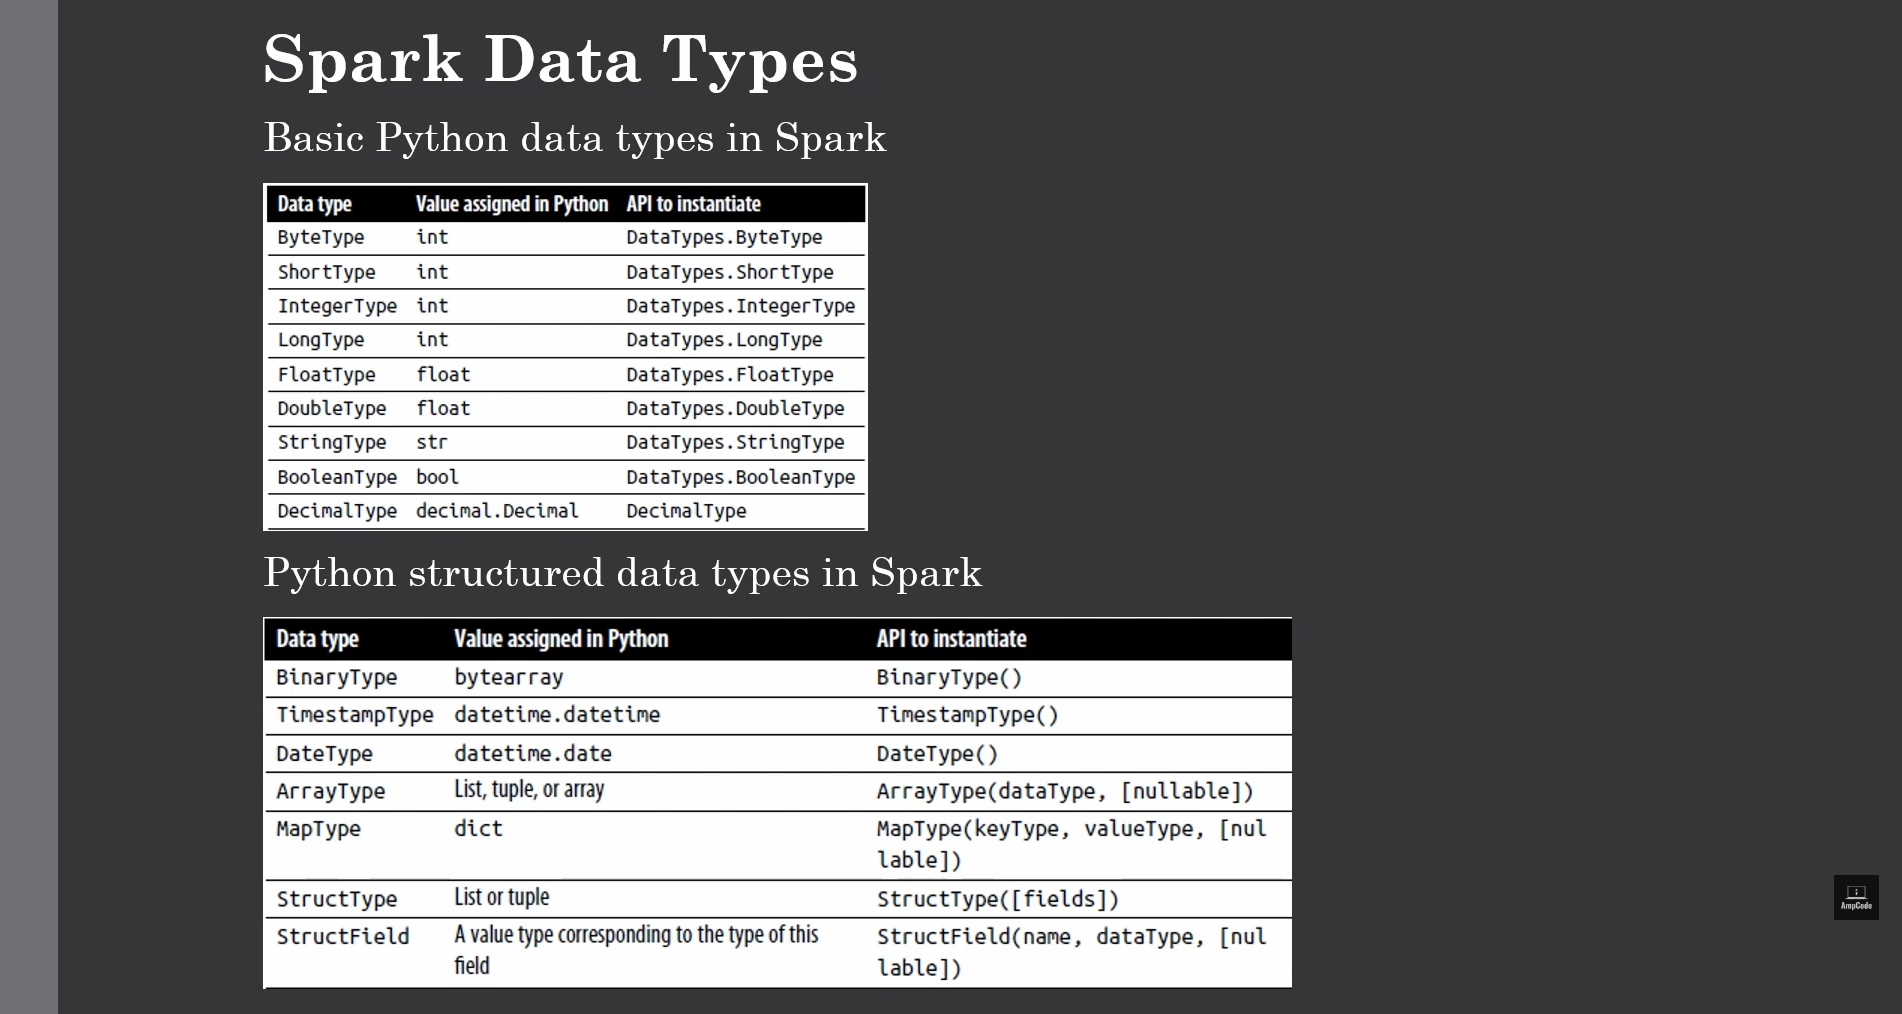

In [23]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

schema = StructType([
            StructField("input_timestamp", StringType(), True)])

dates = ['2019-07-01 12:01:19.111',
    '2019-06-24 12:01:19.222',
    '2019-11-16 16:44:55.406',
    '2019-11-16 16:50:59.406']

df = spark.createDataFrame(list( zip(dates)), schema=schema)

df.withColumn('input_timestamp',to_timestamp(col('input_timestamp')))\
  .withColumn('current_timestamp', current_timestamp().alias('current_timestamp'))\
  .withColumn('DiffInSeconds',current_timestamp().cast(LongType()) - col('input_timestamp').cast(LongType()))\
  .withColumn('DiffInMinutes',round(col('DiffInSeconds')/60))\
  .withColumn('DiffInHours',round(col('DiffInSeconds')/3600))\
  .withColumn('DiffInDays',round(col('DiffInSeconds')/24*3600))\
  .show()

+--------------------+--------------------+-------------+-------------+-----------+--------------+
|     input_timestamp|   current_timestamp|DiffInSeconds|DiffInMinutes|DiffInHours|    DiffInDays|
+--------------------+--------------------+-------------+-------------+-----------+--------------+
|2019-07-01 12:01:...|2025-08-01 13:23:...|    192072155|    3201203.0|    53353.0|2.881082325E10|
|2019-06-24 12:01:...|2025-08-01 13:23:...|    192676955|    3211283.0|    53521.0|2.890154325E10|
|2019-11-16 16:44:...|2025-08-01 13:23:...|    180131939|    3002199.0|    50037.0|2.701979085E10|
|2019-11-16 16:50:...|2025-08-01 13:23:...|    180131575|    3002193.0|    50037.0|2.701973625E10|
+--------------------+--------------------+-------------+-------------+-----------+--------------+



----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 65350)
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\Users\ASUS\Hexaware_DataEngineering\PySpark\my_venv\lib\site-packages\pyspark\accumulators.py", line 295, in handle
    poll(accum_updates)
  File "C:\Users\ASUS\Hexaware_DataEngineering\PySpark\my_venv\lib\sit